In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re

In [2]:

df=pd.read_csv(r"C:\Users\71591\Desktop\dataset\LaptopData (1).csv")
df.drop(columns= ['Unnamed: 0'], inplace= True)
# Display the DataFrame
df.head()  # Display the first few rows of the DataFrame


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
#get a summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


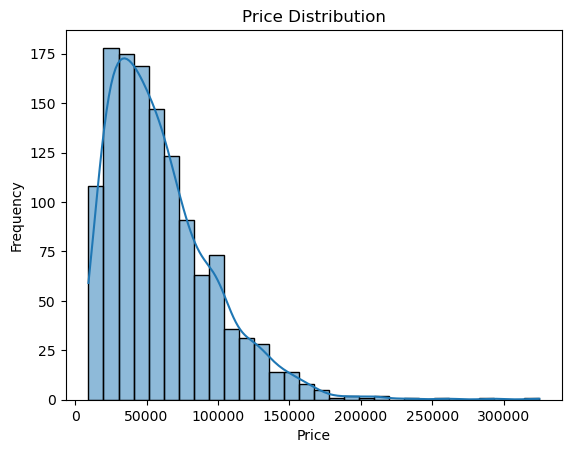

In [4]:


sb.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


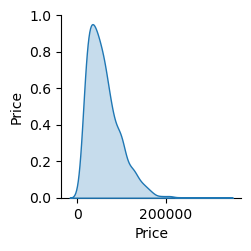

In [5]:
sb.pairplot(df, diag_kind='kde')
plt.show()


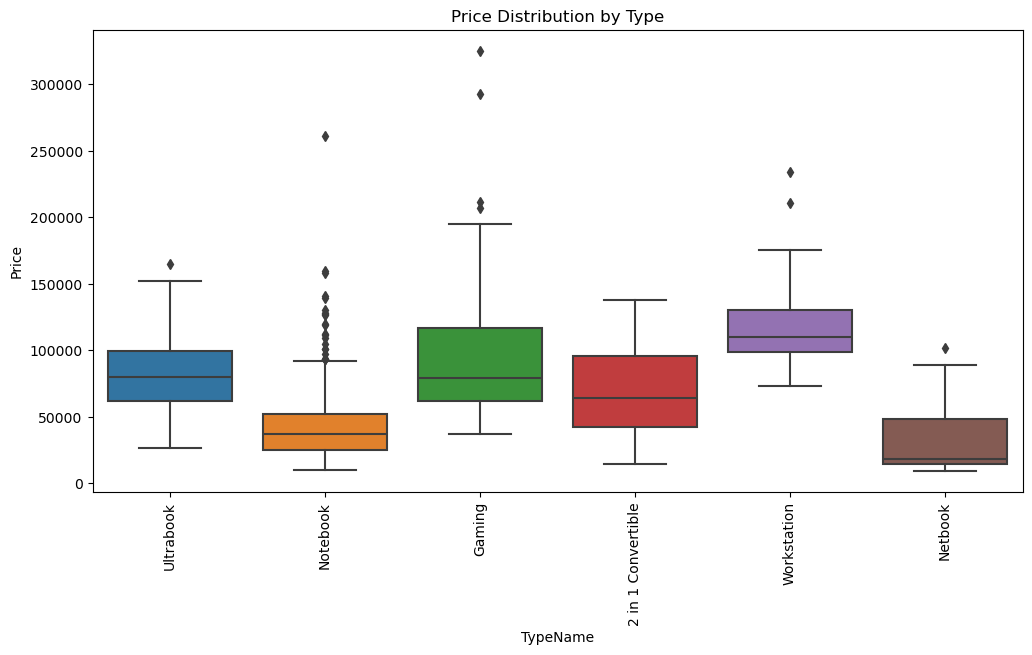

In [6]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=df, x='TypeName', y='Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Type')
plt.show()


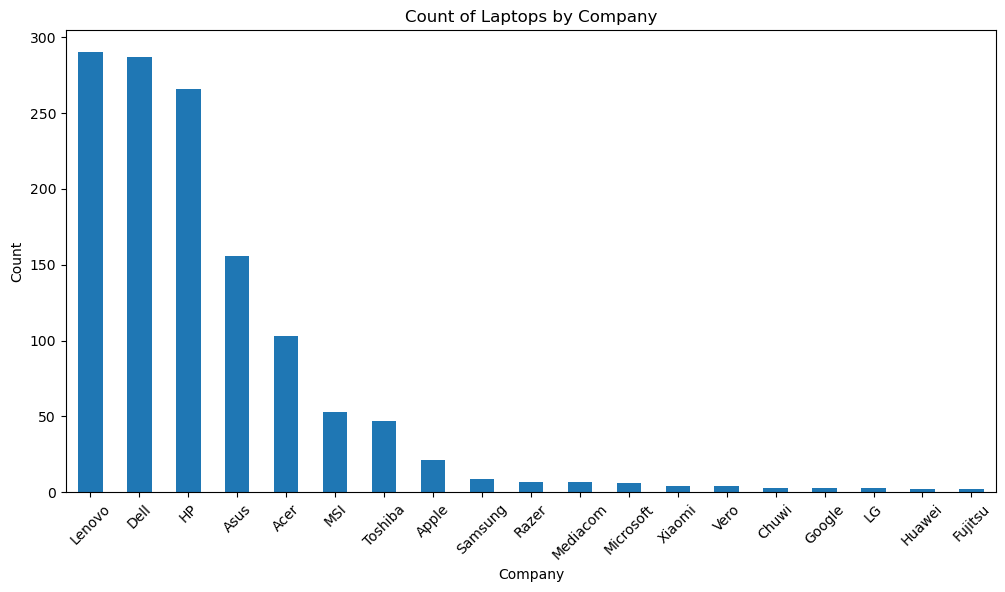

In [7]:
plt.figure(figsize=(12, 6))
df['Company'].value_counts().plot(kind='bar')
plt.title('Count of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


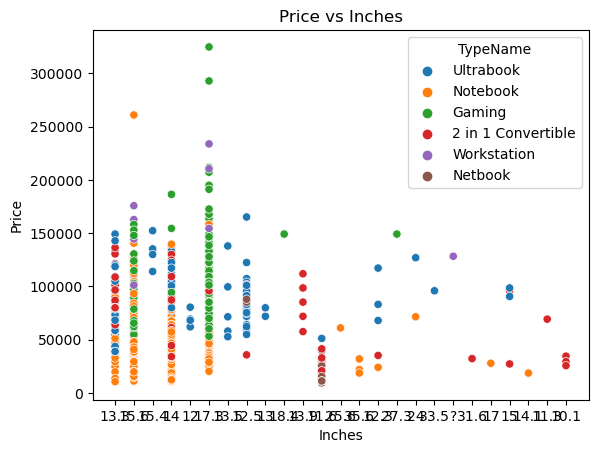

In [8]:
sb.scatterplot(data=df, x='Inches', y='Price', hue='TypeName')
plt.title('Price vs Inches')
plt.show()


In [9]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)
df_train

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.5kg,42010.7472
904,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,104588.1072
439,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Linux,2kg,29783.5200
581,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,53733.9456
676,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,60472.8000
...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,42570.7200
1130,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.04kg,33513.1200
1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
860,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,45323.1648


In [10]:
df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [11]:
df.dropna(inplace = True)
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

C:\Users\71591\AppData\Local\Temp\ipykernel_25572\3880960140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace = True)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 1158 to 1126
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           872 non-null    object 
 1   TypeName          872 non-null    object 
 2   Inches            872 non-null    object 
 3   ScreenResolution  872 non-null    object 
 4   Cpu               872 non-null    object 
 5   Ram               872 non-null    object 
 6   Memory            872 non-null    object 
 7   Gpu               872 non-null    object 
 8   OpSys             872 non-null    object 
 9   Weight            872 non-null    object 
 10  Price             872 non-null    float64
dtypes: float64(1), object(10)
memory usage: 81.8+ KB


#Train df (Feature extraction )

In [13]:
# Memory Train Column
df_train['MemoryType'] = df_train['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')

def extract_memory_capacity(memory):
    memory_parts = memory.split()
    size_part = memory_parts[0]
    
    numeric_part = ''.join([char for char in size_part if char.isdigit()])
    unit_part = ''.join([char for char in size_part if char.isalpha()])
    
    if numeric_part:
        capacity = float(numeric_part)
        if unit_part.upper() == 'TB':
            capacity *= 1024
        return capacity
    return None

df_train['MemoryCapacity'] = df_train['Memory'].apply(extract_memory_capacity)
df_train['MemoryCapacity'] = pd.to_numeric(df_train['MemoryCapacity'], errors='coerce')

print(df_train[['MemoryType', 'MemoryCapacity']])


     MemoryType  MemoryCapacity
1158        HDD         10240.0
904         SSD           512.0
439         SSD           256.0
581         HDD           500.0
676         SSD           256.0
...         ...             ...
1044        HDD           500.0
1095        SSD           256.0
1130        HDD          2048.0
860         HDD          1024.0
1126        HDD            64.0

[872 rows x 2 columns]


C:\Users\71591\AppData\Local\Temp\ipykernel_25572\1764034589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MemoryType'] = df_train['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\1764034589.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MemoryCapacity'] = df_train['Memory'].apply(extract_memory_capacity)
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\1764034589.py:19: SettingWithCopyWarning: 
A value is trying to 

In [14]:
# CPU Train Column
def get_cpu_model(cpu):
    components = cpu.split(' ')
    if components[-1].endswith('GHz'):
        return ' '.join(components[:-1])
    else:
        return ' '.join(components[:-2])

def get_clock_speed(cpu):
    speed = cpu.split(' ')[-1]
    return speed.replace('GHz', '')

# Apply the functions
df_train['CPU_Model'] = df_train['Cpu'].apply(get_cpu_model)
df_train['CPU_Clock_Speed'] = df_train['Cpu'].apply(get_clock_speed)
df_train['CPU_Clock_Speed'] = pd.to_numeric(df_train['CPU_Clock_Speed'], errors='coerce')

df_train[['CPU_Model', 'CPU_Clock_Speed']]


C:\Users\71591\AppData\Local\Temp\ipykernel_25572\757239788.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CPU_Model'] = df_train['Cpu'].apply(get_cpu_model)
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\757239788.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CPU_Clock_Speed'] = df_train['Cpu'].apply(get_clock_speed)
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\757239788.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,CPU_Model,CPU_Clock_Speed
1158,Intel Core i5 6200U,2.30
904,Intel Core i5 7200U,2.50
439,Intel Core i5 7200U,2.50
581,Intel Core i5 7300U,2.60
676,Intel Core i5 7200U,2.50
...,...,...
1044,Intel Core i5 6200U,2.30
1095,Intel Core i5 7200U,2.50
1130,Intel Core i7 7500U,2.70
860,Intel Core i5 7200U,2.50


In [15]:
# GPU Train Column
def get_gpu_brand(gpu):
    return gpu.split(' ')[0]

# Apply the function
df_train['GPU_Brand'] = df_train['Gpu'].apply(get_gpu_brand)

# Display the updated DataFrame with the new column
df_train[['Gpu', 'GPU_Brand']]


C:\Users\71591\AppData\Local\Temp\ipykernel_25572\796270953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['GPU_Brand'] = df_train['Gpu'].apply(get_gpu_brand)


,Gpu,GPU_Brand
1158,AMD Radeon R5 M330,AMD
904,Intel HD Graphics 620,Intel
439,Intel HD Graphics 620,Intel
581,Intel HD Graphics 620,Intel
676,Intel HD Graphics 620,Intel
...,...,...
1044,Intel HD Graphics 520,Intel
1095,Nvidia GeForce GTX 950M,Nvidia
1130,Intel HD Graphics 620,Intel
860,Intel HD Graphics 620,Intel


In [16]:
# RAM Train Column
df_train['RAM_Size'] = df_train['Ram'].str.replace('GB', '')
df_train['RAM_Size'] = pd.to_numeric(df_train['RAM_Size'], errors='coerce')

# Display the updated DataFrame with the new column
print(df_train['RAM_Size'])


1158    8
904     8
439     4
581     8
676     8
       ..
1044    4
1095    8
1130    8
860     8
1126    4
Name: RAM_Size, Length: 872, dtype: int64


C:\Users\71591\AppData\Local\Temp\ipykernel_25572\2438491787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RAM_Size'] = df_train['Ram'].str.replace('GB', '')
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\2438491787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RAM_Size'] = pd.to_numeric(df_train['RAM_Size'], errors='coerce')


In [17]:
# Weight Train Column
df_train['Laptop_Weight'] = df_train['Weight'].str.replace('kg', '')
df_train['Laptop_Weight'] = pd.to_numeric(df_train['Laptop_Weight'], errors='coerce')

# Display the updated DataFrame with the new column
df_train['Laptop_Weight']


C:\Users\71591\AppData\Local\Temp\ipykernel_25572\1060384440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Laptop_Weight'] = df_train['Weight'].str.replace('kg', '')
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\1060384440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Laptop_Weight'] = pd.to_numeric(df_train['Laptop_Weight'], errors='coerce')


1158    2.50
904     1.95
439     2.00
581     1.90
676     1.10
        ... 
1044    1.54
1095    2.40
1130    2.04
860     2.30
1126    0.69
Name: Laptop_Weight, Length: 872, dtype: float64

In [18]:
# Extract screen details
def extract_screen_details(resolution):
    if pd.isna(resolution):
        return None, 0, np.nan, np.nan
    
    parts = resolution.split(' ')
    screen_name = ' '.join(parts[:-1])
    resolution_part = parts[-1]
    
    if 'x' in resolution_part:
        resolution_parts = resolution_part.split('x')
        width = int(resolution_parts[0])
        height = int(resolution_parts[1])
    else:
        width = np.nan
        height = np.nan
    
    screen_type = None
    touchscreen = 0
    
    for part in parts:
        if 'Panel' in part:
            screen_type = part
        elif 'Touchscreen' in part:
            touchscreen = 1
    
    return screen_name, touchscreen, width, height

# Apply the function
df_train['ScreenName'], df_train['Touchscreen'], df_train['ResolutionWidth'], df_train['ResolutionHeight'] = zip(*df_train['ScreenResolution'].apply(extract_screen_details))
df_train['ResolutionWidth'] = pd.to_numeric(df_train['ResolutionWidth'], errors='coerce')
df_train['ResolutionHeight'] = pd.to_numeric(df_train['ResolutionHeight'], errors='coerce')

# Display the first few rows of the modified dataframe
df_train[['ScreenName', 'Touchscreen', 'ResolutionWidth', 'ResolutionHeight']]


C:\Users\71591\AppData\Local\Temp\ipykernel_25572\266696818.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ScreenName'], df_train['Touchscreen'], df_train['ResolutionWidth'], df_train['ResolutionHeight'] = zip(*df_train['ScreenResolution'].apply(extract_screen_details))
C:\Users\71591\AppData\Local\Temp\ipykernel_25572\266696818.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ScreenName'], df_train['Touchscreen'], df_train['ResolutionWidth'], df_train['ResolutionHeight'] = zip

,ScreenName,Touchscreen,ResolutionWidth,ResolutionHeight
1158,Full HD,0,1920,1080
904,IPS Panel Full HD,0,1920,1080
439,Full HD,0,1920,1080
581,,0,1366,768
676,Full HD,0,1920,1080
...,...,...,...,...
1044,Full HD,0,1920,1080
1095,Full HD,0,1920,1080
1130,,0,1366,768
860,IPS Panel Full HD,0,1920,1080


In [19]:
#df_train.drop(columns=['GPU_Brand', 'Weight'], inplace=True)  
#df_train.drop(columns=['CPU_Model', 'CPU_Clock_Speed'], inplace=True)  
#df_train.drop(columns=['ScreenName', 'Touchscreen'], inplace=True)  
#df_train.head()


In [20]:
df_train.select_dtypes(exclude = np.number).columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'MemoryType', 'CPU_Model',
       'GPU_Brand', 'ScreenName'],
      dtype='object')

In [21]:
df_train.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'MemoryType',
       'MemoryCapacity', 'CPU_Model', 'CPU_Clock_Speed', 'GPU_Brand',
       'RAM_Size', 'Laptop_Weight', 'ScreenName', 'Touchscreen',
       'ResolutionWidth', 'ResolutionHeight'],
      dtype='object')

#Test df (Feature extraction )

In [22]:
# Memory Test Column
df_test['MemoryType'] = df_test['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')

def extract_memory_capacity(memory):
    memory_parts = memory.split()
    size_part = memory_parts[0]
    
    numeric_part = ''.join([char for char in size_part if char.isdigit()])
    unit_part = ''.join([char for char in size_part if char.isalpha()])
    
    if numeric_part:
        capacity = float(numeric_part)
        if unit_part.upper() == 'TB':
            capacity *= 1024
        return capacity
    return None

df_test['MemoryCapacity'] = df_test['Memory'].apply(extract_memory_capacity)
df_test['MemoryCapacity'] = pd.to_numeric(df_test['MemoryCapacity'], errors='coerce')

# Display relevant columns
df_test[['MemoryType', 'MemoryCapacity']]


,MemoryType,MemoryCapacity
479,SSD,256.0
1022,SSD,256.0
298,HDD,1024.0
1265,HDD,1024.0
582,SSD,128.0
...,...,...
672,SSD,256.0
506,SSD,256.0
668,SSD,256.0
778,SSD,512.0


In [23]:
# CPU Test Column
def retrieve_cpu_model(cpu_string):
    segments = cpu_string.split(' ')
    if segments[-1].endswith('GHz'):
        return ' '.join(segments[:-1])
    else:
        return ' '.join(segments[:-2])

def retrieve_clock_speed(cpu_string):
    speed_segment = cpu_string.split(' ')[-1]
    return speed_segment.replace('GHz', '')

# Apply the functions to the test dataset
df_test['CPU_Model'] = df_test['Cpu'].apply(retrieve_cpu_model)
df_test['CPU_Clock_Speed'] = df_test['Cpu'].apply(retrieve_clock_speed)
df_test['CPU_Clock_Speed'] = pd.to_numeric(df_test['CPU_Clock_Speed'], errors='coerce')

# Display relevant columns
df_test[['CPU_Model', 'CPU_Clock_Speed']]


,CPU_Model,CPU_Clock_Speed
479,Intel Core i5 7200U,2.5
1022,Intel Core i5 7200U,2.5
298,AMD A10-Series 9600P,2.4
1265,Intel Core i7 6700HQ,2.6
582,Intel Core i3 7100U,2.4
...,...,...
672,Intel Core i5 7200U,2.5
506,Intel Core i7 7500U,2.7
668,Intel Core i5 7200U,2.5
778,Intel Core i7 7700HQ,2.8


In [24]:
# GPU Test Column
def retrieve_gpu_brand(gpu_info):
    return gpu_info.split(' ')[0]

df_test['GPU_Brand'] = df_test['Gpu'].apply(retrieve_gpu_brand)

# Show relevant columns
df_test[['Gpu', 'GPU_Brand']]


,Gpu,GPU_Brand
479,Intel HD Graphics 620,Intel
1022,Intel HD Graphics 620,Intel
298,AMD Radeon R5 430,AMD
1265,Nvidia GeForce GTX 960M,Nvidia
582,Intel HD Graphics 620,Intel
...,...,...
672,Intel HD Graphics 620,Intel
506,Intel HD Graphics 620,Intel
668,Intel HD Graphics 620,Intel
778,Nvidia GeForce GTX 1060,Nvidia


In [25]:
# RAM Test Column
df_test['RAM_Size'] = df_test['Ram'].str.replace('GB', '', regex=False)
df_test['RAM_Size'] = pd.to_numeric(df_test['RAM_Size'], errors='coerce')

# Display the updated column
df_test['RAM_Size']


479      8
1022     8
298      6
1265     8
582      4
        ..
672      8
506      8
668      8
778     16
723     32
Name: RAM_Size, Length: 379, dtype: int64

In [26]:
# Weight Test Column
df_test['Laptop_Weight'] = df_test['Weight'].str.replace('kg', '', regex=False)
df_test['Laptop_Weight'] = pd.to_numeric(df_test['Laptop_Weight'], errors='coerce')

# Display the updated column
df_test['Laptop_Weight']


479     1.05
1022    1.11
298     2.40
1265    2.60
582     1.49
        ... 
672     1.30
506     2.00
668     2.00
778     1.95
723     4.36
Name: Laptop_Weight, Length: 379, dtype: float64

In [27]:
# Screen Resolution Test Column
def parse_screen_info(resolution):
    if pd.isna(resolution):
        return None, 0, np.nan, np.nan
    
    components = resolution.split(' ')
    screen_identifier = ' '.join(components[:-1])
    res_part = components[-1]
    
    if 'x' in res_part:
        dimensions = res_part.split('x')
        width = int(dimensions[0])
        height = int(dimensions[1])
    else:
        width = np.nan
        height = np.nan
    
    screen_type = None
    is_touchscreen = 0
    
    for component in components:
        if 'Panel' in component:
            screen_type = component
        elif 'Touchscreen' in component:
            is_touchscreen = 1
    
    return screen_identifier, is_touchscreen, width, height

# Apply the function
df_test['ScreenName'], df_test['Touchscreen'], df_test['ResolutionWidth'], df_test['ResolutionHeight'] = zip(*df_test['ScreenResolution'].apply(parse_screen_info))
df_test['ResolutionWidth'] = pd.to_numeric(df_test['ResolutionWidth'], errors='coerce')
df_test['ResolutionHeight'] = pd.to_numeric(df_test['ResolutionHeight'], errors='coerce')

# Display the updated columns
df_test[['ScreenName', 'Touchscreen', 'ResolutionWidth', 'ResolutionHeight']]


,ScreenName,Touchscreen,ResolutionWidth,ResolutionHeight
479,IPS Panel Full HD,0,1920,1080
1022,IPS Panel Full HD,0,1920,1080
298,Full HD,0,1920,1080
1265,IPS Panel Full HD,0,1920,1080
582,Full HD,0,1920,1080
...,...,...,...,...
672,IPS Panel Full HD / Touchscreen,1,1920,1080
506,Full HD,0,1920,1080
668,IPS Panel Full HD,0,1920,1080
778,Full HD,0,1920,1080


In [28]:
# Remove unnecessary columns from the test DataFrame
#df_test.drop(columns=['Memory', 'Cpu', 'ScreenResolution'], inplace=True)

# Display the first few rows of the updated DataFrame
#df_test.head()


In [29]:
df_test.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'MemoryType',
       'MemoryCapacity', 'CPU_Model', 'CPU_Clock_Speed', 'GPU_Brand',
       'RAM_Size', 'Laptop_Weight', 'ScreenName', 'Touchscreen',
       'ResolutionWidth', 'ResolutionHeight'],
      dtype='object')

In [30]:
df_train.isna().sum()
df_train.dropna(inplace = True)
df_train.isna().sum()

C:\Users\71591\AppData\Local\Temp\ipykernel_25572\2083229702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace = True)


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
MemoryType          0
MemoryCapacity      0
CPU_Model           0
CPU_Clock_Speed     0
GPU_Brand           0
RAM_Size            0
Laptop_Weight       0
ScreenName          0
Touchscreen         0
ResolutionWidth     0
ResolutionHeight    0
dtype: int64

In [31]:
df_test.isna().sum()
df_test.dropna(inplace = True)
df_test.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
MemoryType          0
MemoryCapacity      0
CPU_Model           0
CPU_Clock_Speed     0
GPU_Brand           0
RAM_Size            0
Laptop_Weight       0
ScreenName          0
Touchscreen         0
ResolutionWidth     0
ResolutionHeight    0
dtype: int64

In [32]:
categorical = df_train.select_dtypes(exclude = np.number).columns
categorical

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'MemoryType', 'CPU_Model',
       'GPU_Brand', 'ScreenName'],
      dtype='object')

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit the encoder on the training data and transform both train and test data
df_train_encoded = encoder.fit_transform(df_train[categorical])
df_test_encoded = encoder.transform(df_test[categorical])


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 6, 7, 9, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [34]:
print(df_train.dtypes)


Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
MemoryType           object
MemoryCapacity      float64
CPU_Model            object
CPU_Clock_Speed     float64
GPU_Brand            object
RAM_Size              int64
Laptop_Weight       float64
ScreenName           object
Touchscreen           int64
ResolutionWidth       int64
ResolutionHeight      int64
dtype: object


In [35]:
#classes = dict()
#le = LabelEncoder()
#for col in categorical:
 #   df_train[col]= le.fit_transform(df_train[col])
  #  df_test[col]= le.transform(df_test[col])
   # classes[col] = le.classes_

In [36]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

C:\Users\71591\AppData\Local\Temp\ipykernel_25572\21152926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace = True)


In [34]:
x_train, y_train = df_train.drop(columns = 'Price').values, df_train['Price'].values
x_test, y_test = df_test.drop(columns = 'Price').values, df_test['Price'].values

In [37]:
#reg = LinearRegression() # ols
#reg.fit(x_train, y_train)

In [36]:
x_test.shape
x_train.shape

(872, 21)

In [38]:
#y_pred = reg.predict(x_test)

In [39]:
#y_pred[:10]

In [49]:
y_test[:10]

array([ 89084.16,  61218.72,  26586.72,  47898.72,  38308.32,  24455.52,
        63456.48,  18594.72, 101178.72,  38681.28])

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

In [41]:
from sklearn.linear_model import Ridge

#ridge_reg = Ridge(alpha=1.0)
#ridge_reg.fit(x_train, y_train)
#y_pred_ridge = ridge_reg.predict(x_test)

In [ ]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)